In [1]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.viewer.mpl      import createColorBarOnly
from    JointEntropyClass_with_sensitivity_weighting        import JointEntropyInversion as JEI

# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys

# Setting options
seed_val = 420
np.random.seed(seed_val)

# Filenames
fn_ert_dd  = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Data/Synthetic/Synth_ert_dd.dat'
fn_tt      = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Data/Synthetic/Synth_tt.dat'

# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'
lim_ert = [5e1, 1e4]
[r_left, r_right, r_back] = [7e1, 7e3, 7e2]
ert_label = ['Square', 'Circle', 'Half-space']

lim_srt = [300, 4200]
[v_left, v_right, v_layer1, v_layer2] = [3e3, 2e3, 5e2, 4e3]
srt_label = ['Square', 'Circle', 'Layer 1', 'Layer 2']

## Data and Inversion Mesh

In [2]:
# Loading ERT
ert_data = ert.load(fn_ert_dd)
ERT = ert.ERTManager(ert_data)

# Loading SRT
tt_data = pg.physics.traveltime.load(fn_tt)
SRT = TravelTimeManager(tt_data)

# inversion mesh
w = mt.createWorld([-65,-20], [65, 0])
for x in np.arange(-64,65,1):
    w.createNode([x,0])
invmesh = mt.createMesh(w,area=1.5)
extmesh = mt.appendTriangleBoundary(invmesh,xbound=100,ybound=100,marker=0)

# fig, ax = plt.subplots(1,3)
# ERT.showData(ert_data, ax=ax[0], cMap=c_ert)
# SRT.showData(tt_data, ax=ax[1], cMap=c_srt)
# pg.show(invmesh, ax=ax[2])

## Get sensitivities

In [5]:
r_est_con = ERT.invert(ert_data, mesh = extmesh, lam=2, verbose=False)
v_est_con = SRT.invert(tt_data, mesh=invmesh, vTop=500, vBottom=4500, lam=6, secNodes=1, verbose=False, maxIter=30)

J_e = np.array(ERT.inv.fop.jacobian())
sens_ert = (np.dot(J_e.transpose(),J_e)).diagonal()**0.25

J_s = pg.utils.sparseMatrix2Dense(SRT.inv.fop.jacobian())
sens_srt = (np.dot(J_s.transpose(),J_s)).diagonal()**0.25
        
sens_srt_norm = sens_srt.copy()
sens_ert_norm = sens_ert.copy()
sens_srt_norm = sens_srt_norm/max(sens_srt)+1
sens_ert_norm = (sens_ert_norm-min(sens_ert_norm))/(max(sens_ert_norm)-min(sens_ert_norm))+1

13/06/23 - 09:05:00 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 09:05:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 09:05:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:05:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/06/23 - 09:05:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 09:05:01 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 09:05:01 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 09:06:18 - pyGIMLi - INFO - Found 1 regions.


13/06/23 - 09:06:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 09:06:18 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
13/06/23 - 09:06:18 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 09:06:18 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]


## Set order $q$ for following calculations

In [15]:
q = 1

## ME ERT lambda and smoothing tests

13/06/23 - 12:28:51 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 12:28:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 12:28:51 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 12:28:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 12:28:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 12:28:51 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 12:28:51 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 12:28:51 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 5.94
#####     stabilizing functional    S = 39.22
#####     joint weighted misfit chi^2 = 5.94
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.57
#####     stabilizing functional    S = 309.94
#####     joint weighted misfit chi^2 = 1.57
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.26
#####     stabilizing functional    S = 272.68
#####     joint weighted misfit chi^2 = 1.26
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.12
#####     stabilizing functional    S = 96

13/06/23 - 12:33:26 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 12:33:26 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 12:33:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 12:33:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 12:33:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 12:33:26 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 12:33:26 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 12:33:26 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 10.78
#####     stabilizing functional    S = 5171.42
#####     joint weighted misfit chi^2 = 10.78
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 3.64
#####     stabilizing functional    S = 30484.07
#####     joint weighted misfit chi^2 = 3.64
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.88
#####     stabilizing functional    S = 1108.46
#####     joint weighted misfit chi^2 = 1.88
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.73
#####     stabilizing functional   

13/06/23 - 12:40:47 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 12:40:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 12:40:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 12:40:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 12:40:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 12:40:47 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 12:40:47 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 12:40:47 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 41.33
#####     stabilizing functional    S = 996.95
#####     joint weighted misfit chi^2 = 41.33
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 33.80
#####     stabilizing functional    S = 78.26
#####     joint weighted misfit chi^2 = 33.80
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 31.91
#####     stabilizing functional    S = 11.82
#####     joint weighted misfit chi^2 = 31.91
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 8.88
#####     stabilizing functional    S

13/06/23 - 12:52:30 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 12:52:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 12:52:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 12:52:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 12:52:31 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 12:52:31 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 12:52:31 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 12:52:31 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 5.37
#####     stabilizing functional    S = 37.38
#####     joint weighted misfit chi^2 = 5.37
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.46
#####     stabilizing functional    S = 303.72
#####     joint weighted misfit chi^2 = 1.46
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 0.96
#####     stabilizing functional    S = 932.98
#####     joint weighted misfit chi^2 = 0.96
############################################################
       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          joint chi^2 < 1.00         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

13/06/23 - 12:56:23 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 12:56:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 12:56:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 12:56:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 12:56:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 12:56:23 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 12:56:23 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 12:56:23 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 4.11
#####     stabilizing functional    S = 3583.40
#####     joint weighted misfit chi^2 = 4.11
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.16
#####     stabilizing functional    S = 9614.53
#####     joint weighted misfit chi^2 = 1.16
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 0.99
#####     stabilizing functional    S = 1090.32
#####     joint weighted misfit chi^2 = 0.99
############################################################
       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          joint chi^2 < 1.00         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

13/06/23 - 12:59:37 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 12:59:37 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 12:59:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 12:59:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 12:59:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 12:59:37 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 12:59:37 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 12:59:37 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 30.87
#####     stabilizing functional    S = 4504.94
#####     joint weighted misfit chi^2 = 30.87
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 2.25
#####     stabilizing functional    S = 171.00
#####     joint weighted misfit chi^2 = 2.25
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 2.03
#####     stabilizing functional    S = 23.09
#####     joint weighted misfit chi^2 = 2.03
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=25
#####     ERT weighted misfit chi^2   = 1.85
#####     stabilizing functional   

13/06/23 - 13:08:03 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 13:08:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 13:08:03 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:08:03 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 13:08:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 13:08:03 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 13:08:03 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 13:08:03 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 5.08
#####     stabilizing functional    S = 28.82
#####     joint weighted misfit chi^2 = 5.08
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.15
#####     stabilizing functional    S = 116.14
#####     joint weighted misfit chi^2 = 1.15
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 0.93
#####     stabilizing functional    S = 44.87
#####     joint weighted misfit chi^2 = 0.93
############################################################
       
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
          joint chi^2 < 1.00         
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

13/06/23 - 13:10:59 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 13:10:59 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 13:10:59 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:10:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 13:11:00 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 13:11:00 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 13:11:00 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 13:11:00 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 5.78
#####     stabilizing functional    S = 204.54
#####     joint weighted misfit chi^2 = 5.78
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.33
#####     stabilizing functional    S = 334.55
#####     joint weighted misfit chi^2 = 1.33
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.11
#####     stabilizing functional    S = 11.26
#####     joint weighted misfit chi^2 = 1.11
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.01
#####     stabilizing functional  

13/06/23 - 13:16:28 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 13:16:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 13:16:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:16:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 13:16:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 13:16:28 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 13:16:28 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 13:16:28 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 25.37
#####     stabilizing functional    S = 10471.45
#####     joint weighted misfit chi^2 = 25.37
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 2.04
#####     stabilizing functional    S = 14.31
#####     joint weighted misfit chi^2 = 2.04
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.63
#####     stabilizing functional    S = 7.54
#####     joint weighted misfit chi^2 = 1.63
############################################################
       
Starting iteration 4...
Set JME weights for ERT with q=1, b=1e-10 and a=100
#####     ERT weighted misfit chi^2   = 1.55
#####     stabilizing functional

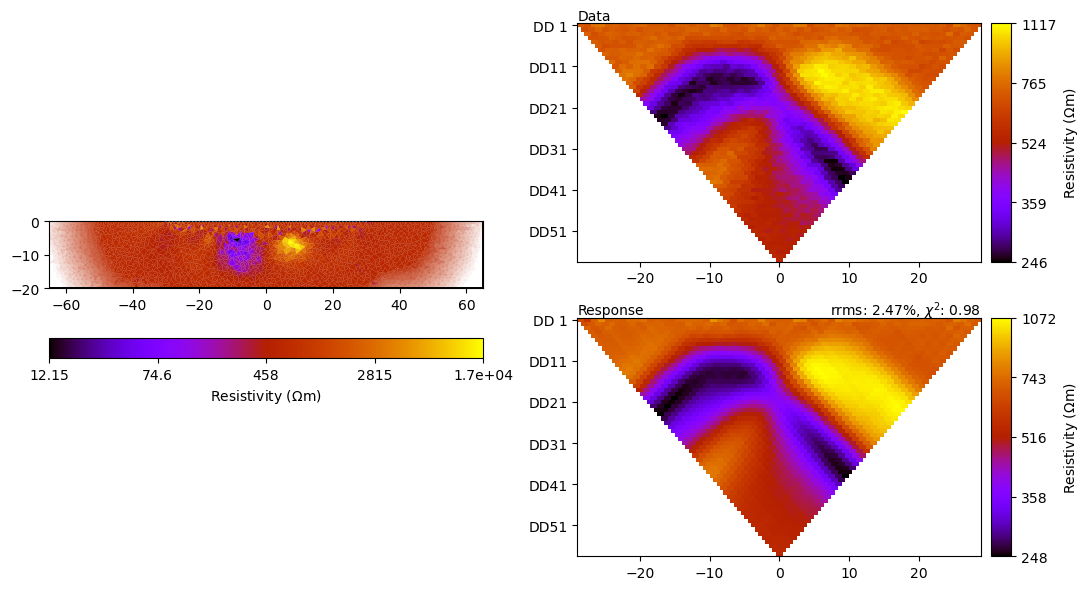

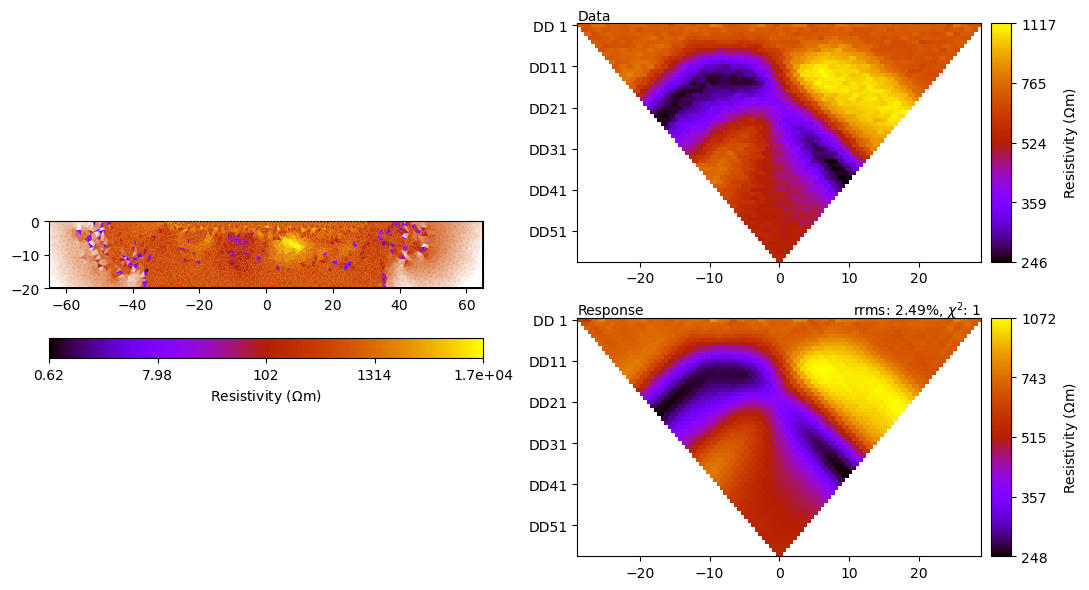

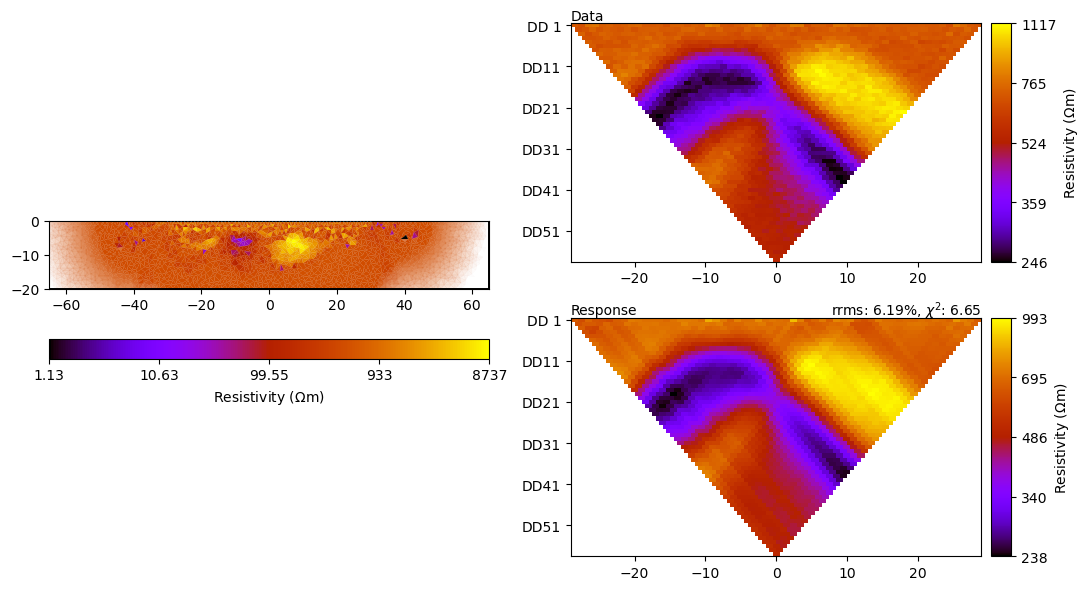

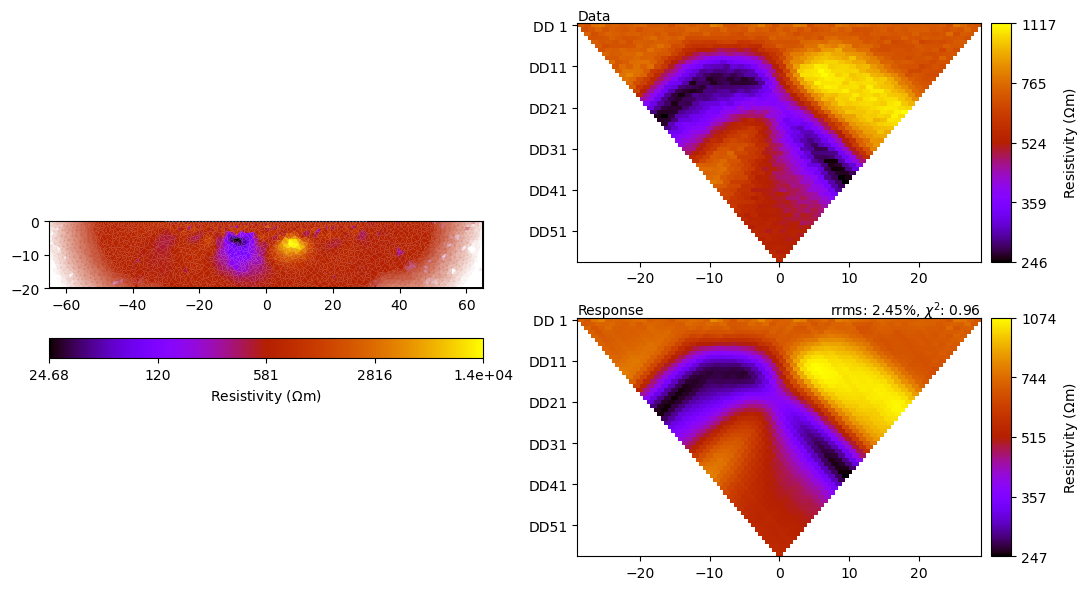

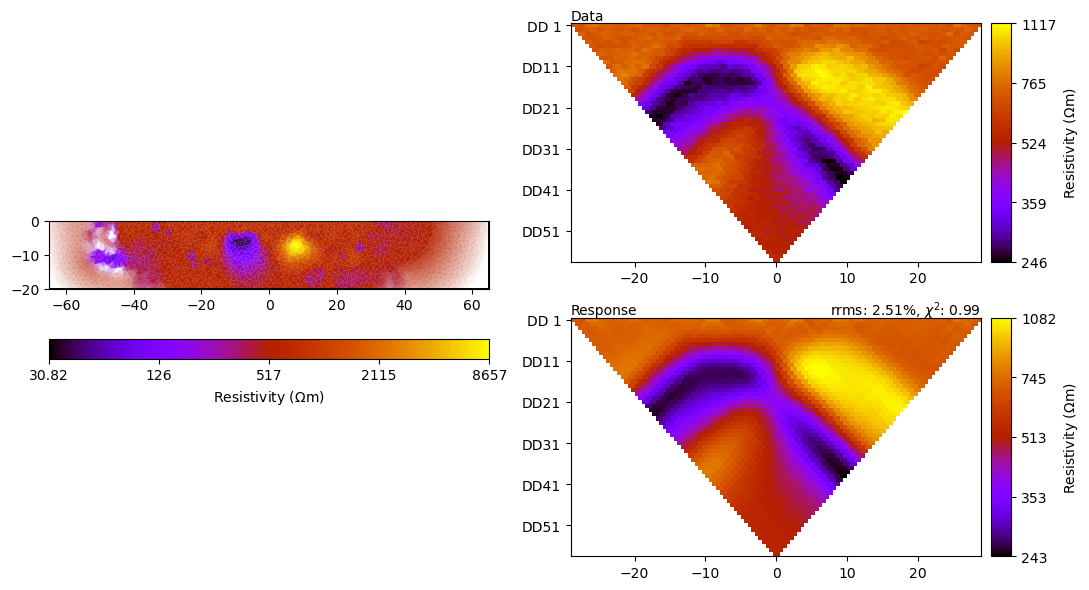

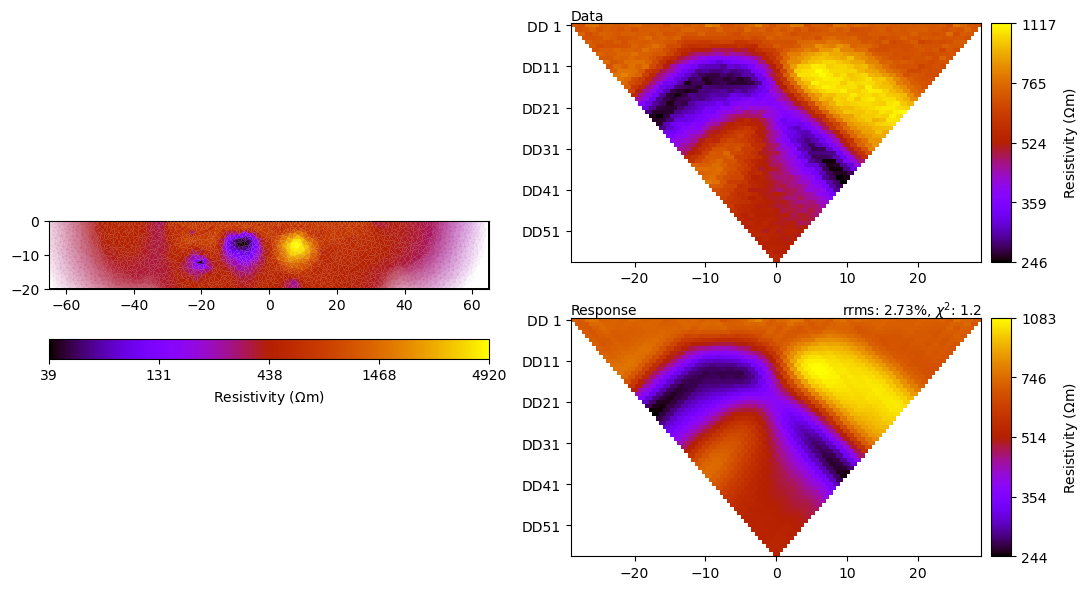

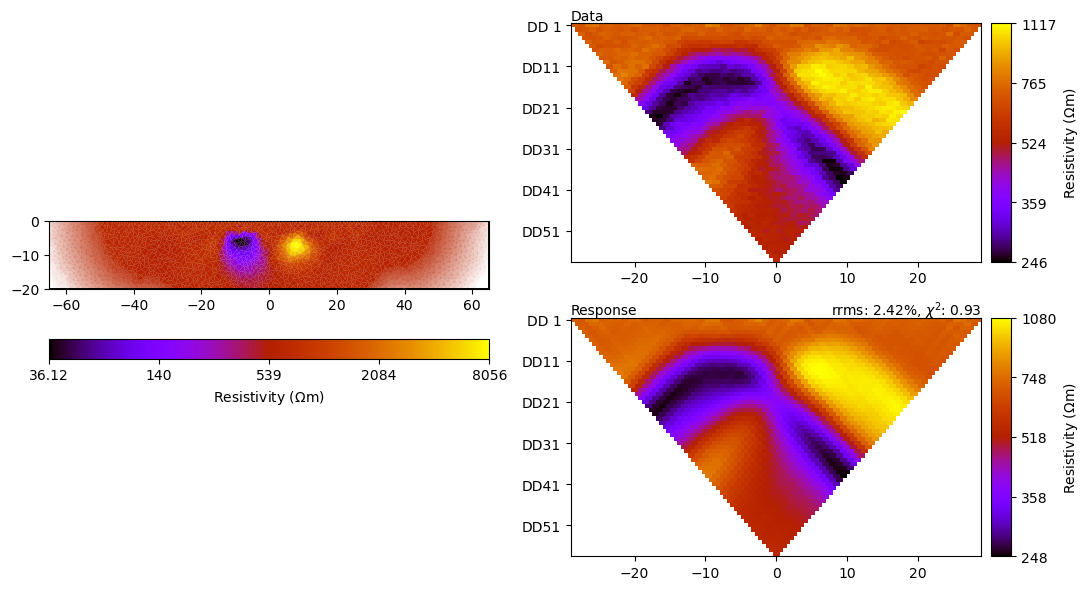

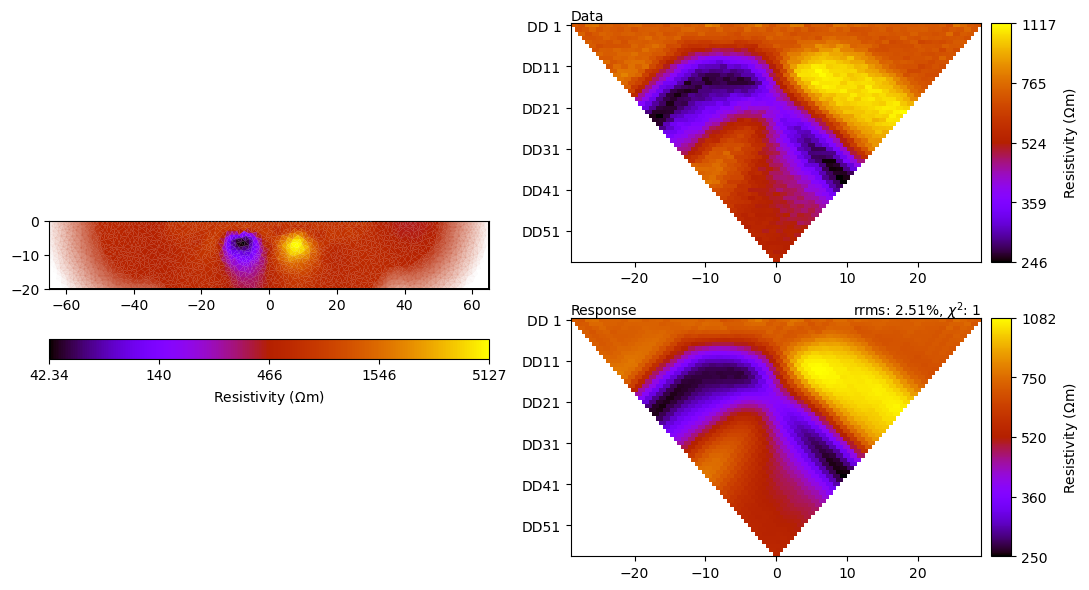

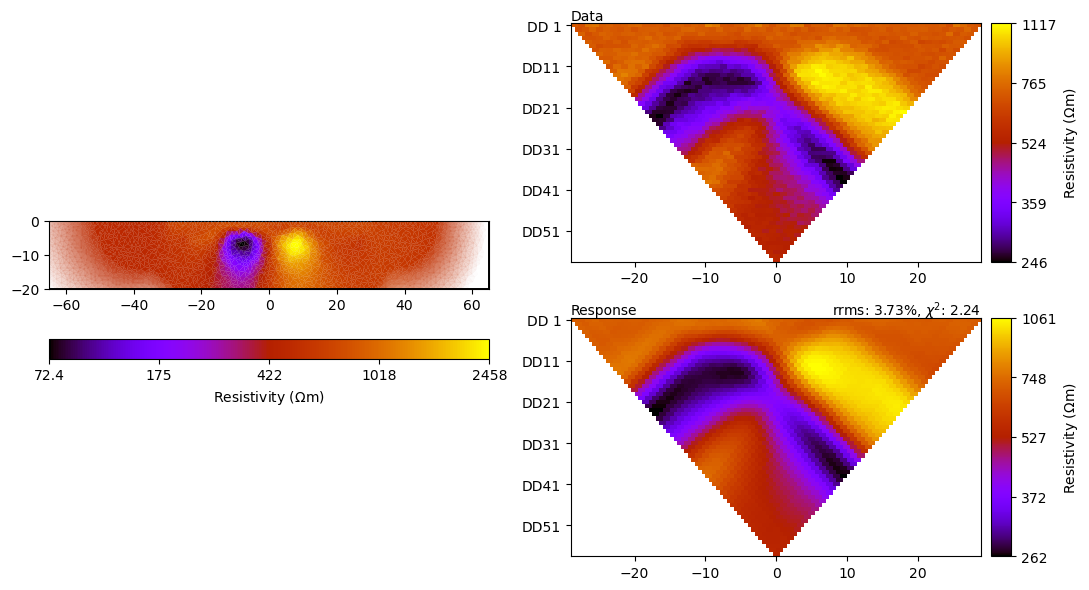

In [16]:
a_list = [0, 25, 100]
lam_list = [1e-5, 1e-3, 1e-1] 
beta = 1e-10

r_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        ERT2 = ert.ERTManager(ert_data)
        Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_ert_norm])

        KWe = dict(lam=lam, verbose=False)
        Je.setKWInv([KWe])
        Je.setNames(['ERT'])
        Je.setMethodMesh(extmesh, 0)

        Je.runInversion('ME', maxIter=10, chi_limit=1)
        ERT2.showResultAndFit(cMap=c_ert)

        [r_est] = Je.getModels()
        
        r_me.append(r_est)
        tit.append(f'lam={lam}, a={a}')

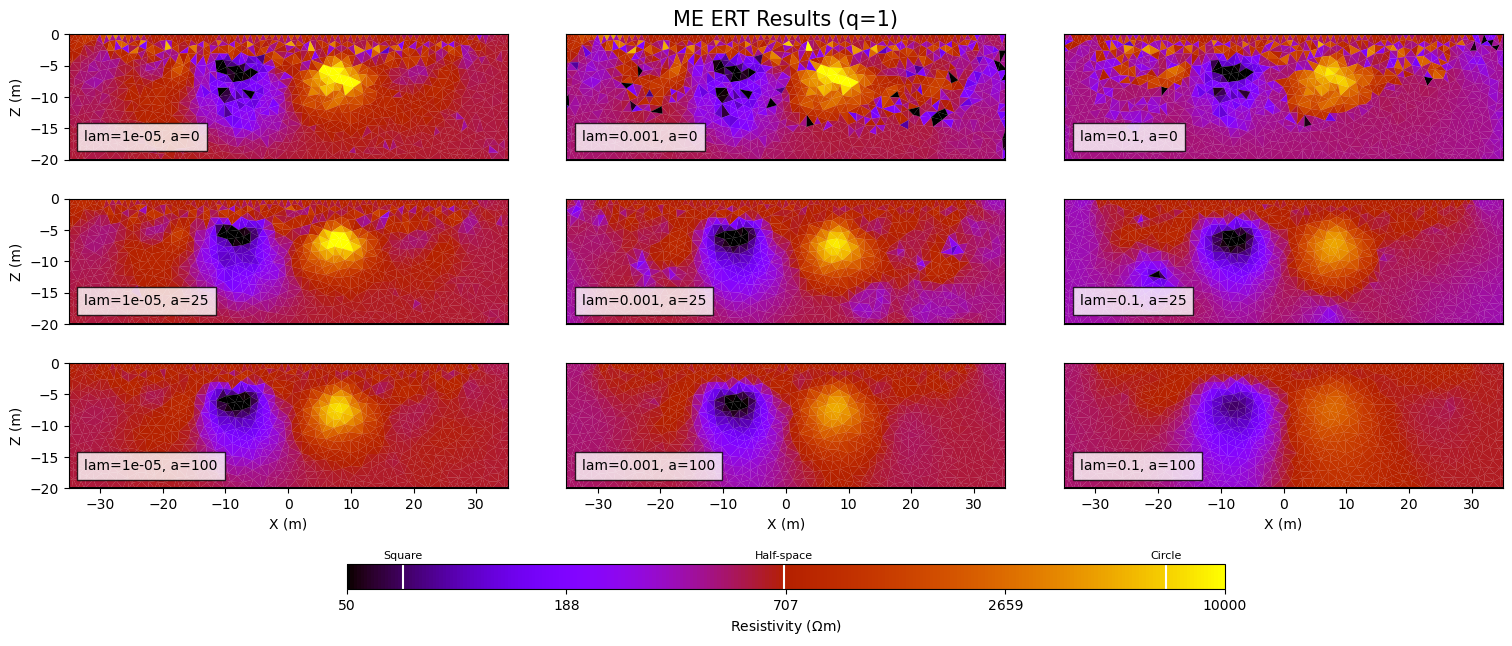

In [17]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'ME ERT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, r_me[i*3+j], ax=ax[i,j], 
                cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], 
                colorBar=False, logScale=True)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_ert[0], cMax=lim_ert[1], logScale=True,cMap=c_ert,
                  label=pg.unit('res'), orientation='horizontal')
for i, r in enumerate([r_left, r_right,r_back]):
    cax.plot([r]*2, [0,1], 'w')
    cax.text(r, 1.3, ert_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')
    
plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_ME_lam_a_q{q}_ERT.pdf', 
            bbox_inches='tight',
           dpi=600)

## ME SRT lambda and smoothing tests

13/06/23 - 13:24:28 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:24:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:24:28 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
13/06/23 - 13:24:28 - pyGIMLi - INFO - Create gradient starting model. 500: 4500


Starting Iteration 0...
... SRT


13/06/23 - 13:24:28 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:24:28 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 633.76
#####     stabilizing functional    S = 172.23
#####     joint weighted misfit chi^2 = 633.76
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 289.08
#####     stabilizing functional    S = 125.10
#####     joint weighted misfit chi^2 = 289.08
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 123.31
#####     stabilizing functional    S = 8.46
#####     joint weighted misfit chi^2 = 123.31
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 38.17
#####     stabilizing function

13/06/23 - 13:26:37 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:26:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:26:37 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 13:26:37 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 13:26:37 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:26:37 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 932.83
#####     stabilizing functional    S = 19293.35
#####     joint weighted misfit chi^2 = 932.83
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 553.98
#####     stabilizing functional    S = 28588.00
#####     joint weighted misfit chi^2 = 553.98
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 230.32
#####     stabilizing functional    S = 12.73
#####     joint weighted misfit chi^2 = 230.32
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 58.07
#####     stabilizing fun

13/06/23 - 13:29:25 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:29:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:29:25 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
13/06/23 - 13:29:26 - pyGIMLi - INFO - Create gradient starting model. 500: 4500


Starting Iteration 0...
... SRT


13/06/23 - 13:29:26 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:29:26 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 1044.27
#####     stabilizing functional    S = 6578.41
#####     joint weighted misfit chi^2 = 1044.27
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 221.43
#####     stabilizing functional    S = 85.14
#####     joint weighted misfit chi^2 = 221.43
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 79.45
#####     stabilizing functional    S = 32.31
#####     joint weighted misfit chi^2 = 79.45
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=0
#####     SRT weighted misfit chi^2   = 78.53
#####     stabilizing functio

13/06/23 - 13:32:31 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:32:31 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:32:31 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 13:32:31 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 13:32:31 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:32:31 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 442.06
#####     stabilizing functional    S = 193.25
#####     joint weighted misfit chi^2 = 442.06
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 80.78
#####     stabilizing functional    S = 578.11
#####     joint weighted misfit chi^2 = 80.78
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 36.94
#####     stabilizing functional    S = 10.84
#####     joint weighted misfit chi^2 = 36.94
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 25.53
#####     stabilizing functio

13/06/23 - 13:36:02 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:36:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:36:02 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 13:36:02 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 13:36:02 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:36:02 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 187.06
#####     stabilizing functional    S = 19932.84
#####     joint weighted misfit chi^2 = 187.06
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 89.94
#####     stabilizing functional    S = 4.61
#####     joint weighted misfit chi^2 = 89.94
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 41.72
#####     stabilizing functional    S = 606.80
#####     joint weighted misfit chi^2 = 41.72
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 35.18
#####     stabilizing functi

13/06/23 - 13:39:33 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:39:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:39:33 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 13:39:34 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 13:39:34 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:39:34 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 150.15
#####     stabilizing functional    S = 20697.89
#####     joint weighted misfit chi^2 = 150.15
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 103.63
#####     stabilizing functional    S = 187.39
#####     joint weighted misfit chi^2 = 103.63
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 55.48
#####     stabilizing functional    S = 21.18
#####     joint weighted misfit chi^2 = 55.48
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=50
#####     SRT weighted misfit chi^2   = 30.52
#####     stabilizing fun

13/06/23 - 13:42:10 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:42:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:42:10 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 13:42:10 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 13:42:10 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:42:10 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 168.30
#####     stabilizing functional    S = 1043.19
#####     joint weighted misfit chi^2 = 168.30
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 78.18
#####     stabilizing functional    S = 63.27
#####     joint weighted misfit chi^2 = 78.18
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 51.07
#####     stabilizing functional    S = 13.79
#####     joint weighted misfit chi^2 = 51.07
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 28.74
#####     stabilizing fun

13/06/23 - 13:45:34 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:45:34 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:45:34 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 13:45:35 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 13:45:35 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:45:35 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 145.68
#####     stabilizing functional    S = 7817.54
#####     joint weighted misfit chi^2 = 145.68
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 81.73
#####     stabilizing functional    S = 43.25
#####     joint weighted misfit chi^2 = 81.73
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 47.69
#####     stabilizing functional    S = 41.36
#####     joint weighted misfit chi^2 = 47.69
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 33.19
#####     stabilizing fun

13/06/23 - 13:48:57 - pyGIMLi - INFO - Found 1 regions.
13/06/23 - 13:48:57 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 13:48:57 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.


Starting Iteration 0...
... SRT


13/06/23 - 13:48:57 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
13/06/23 - 13:48:57 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
13/06/23 - 13:48:57 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 109.10
#####     stabilizing functional    S = 29923.83
#####     joint weighted misfit chi^2 = 109.10
############################################################
       
Starting iteration 2...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 27.14
#####     stabilizing functional    S = 7.78
#####     joint weighted misfit chi^2 = 27.14
############################################################
       
Starting iteration 3...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 10.04
#####     stabilizing functional    S = 8.88
#####     joint weighted misfit chi^2 = 10.04
############################################################
       
Starting iteration 4...
Set JME weights for SRT with q=1, b=1e-10 and a=200
#####     SRT weighted misfit chi^2   = 5.04
#####     stabilizing funct

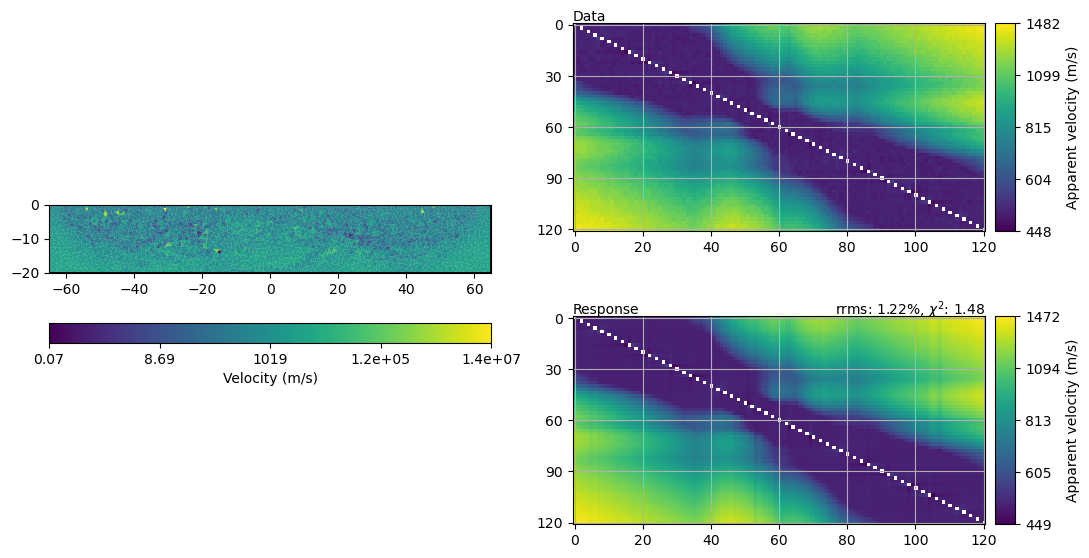

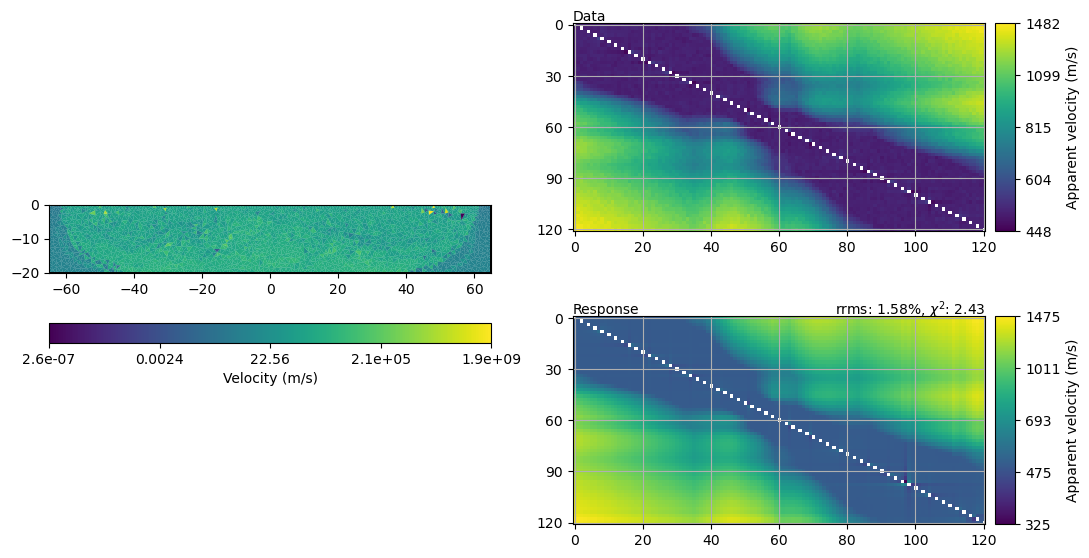

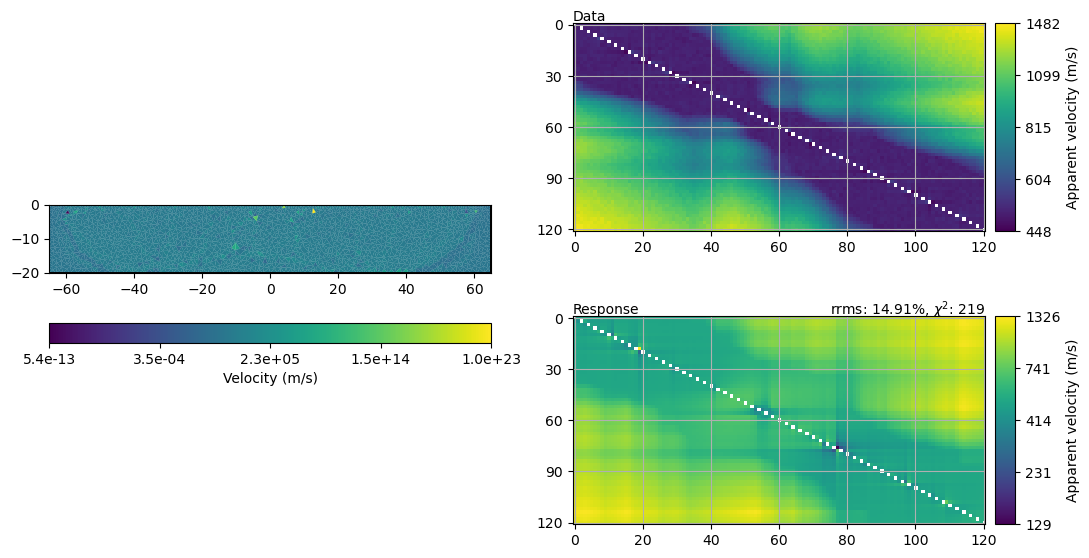

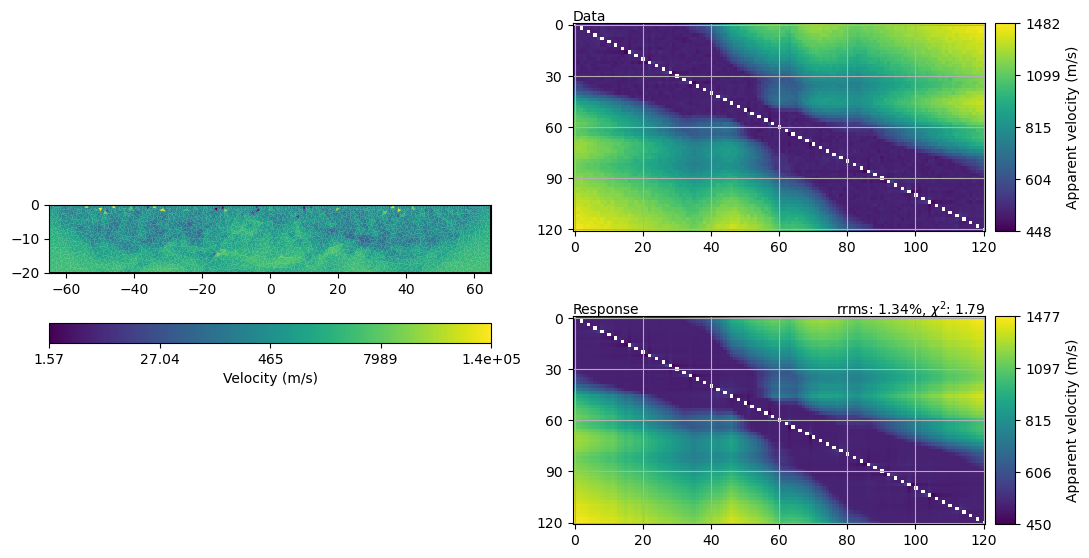

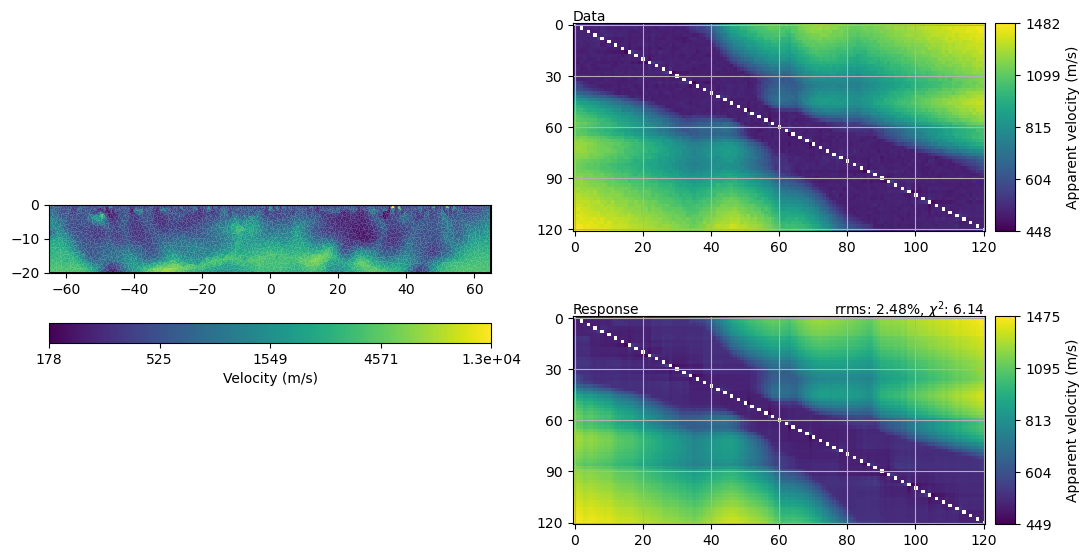

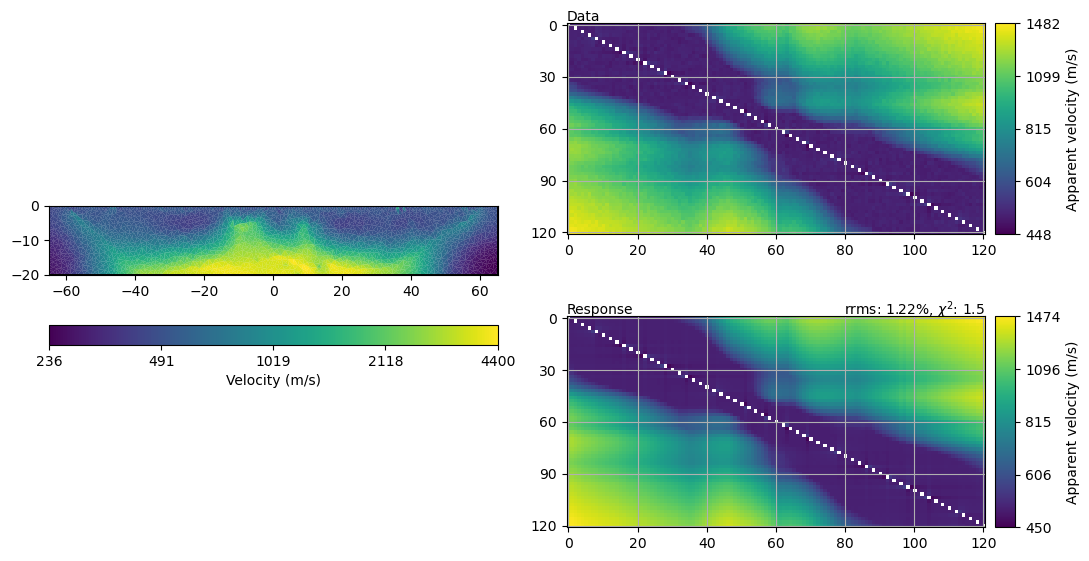

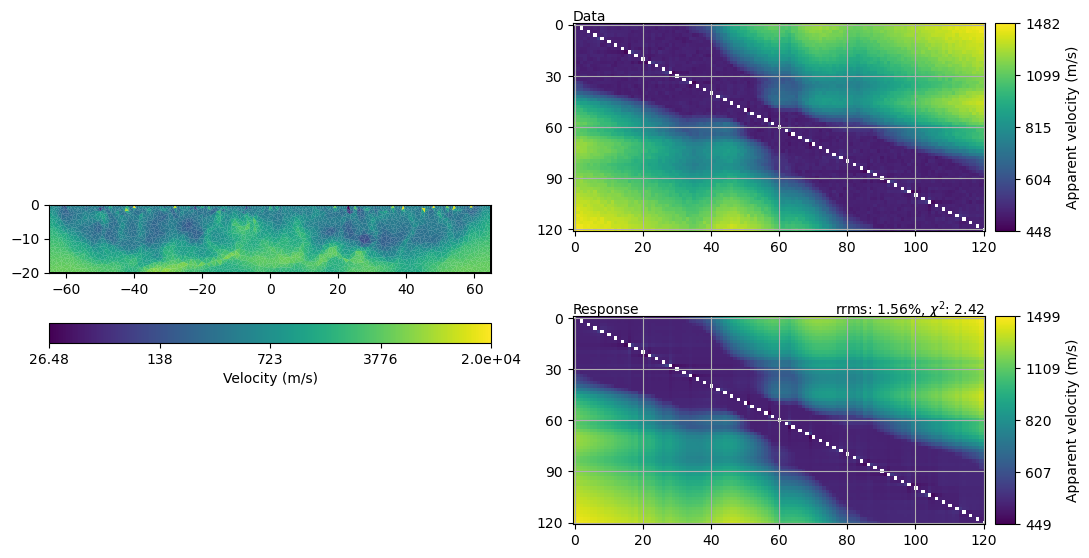

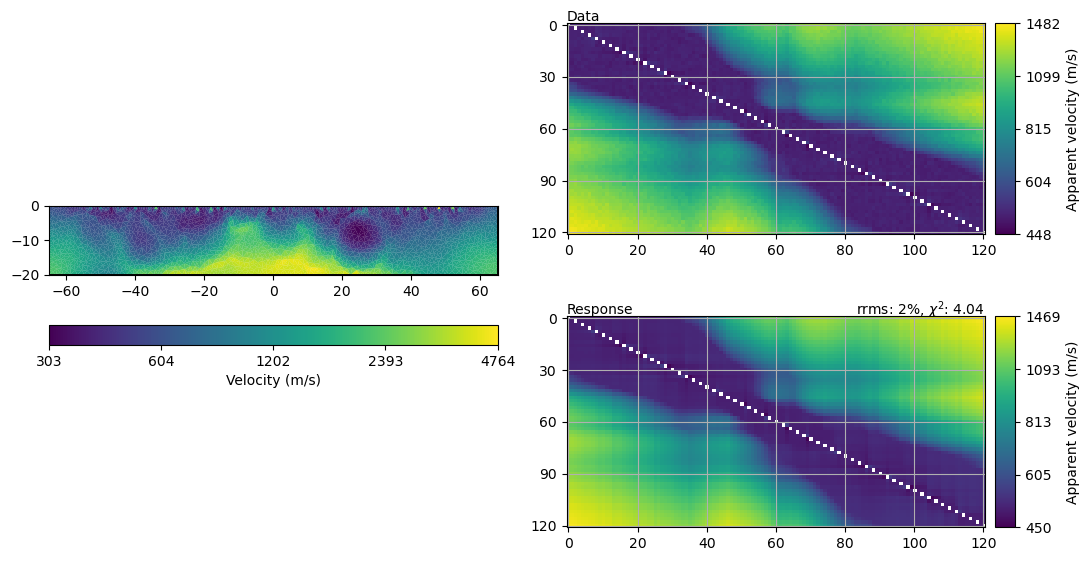

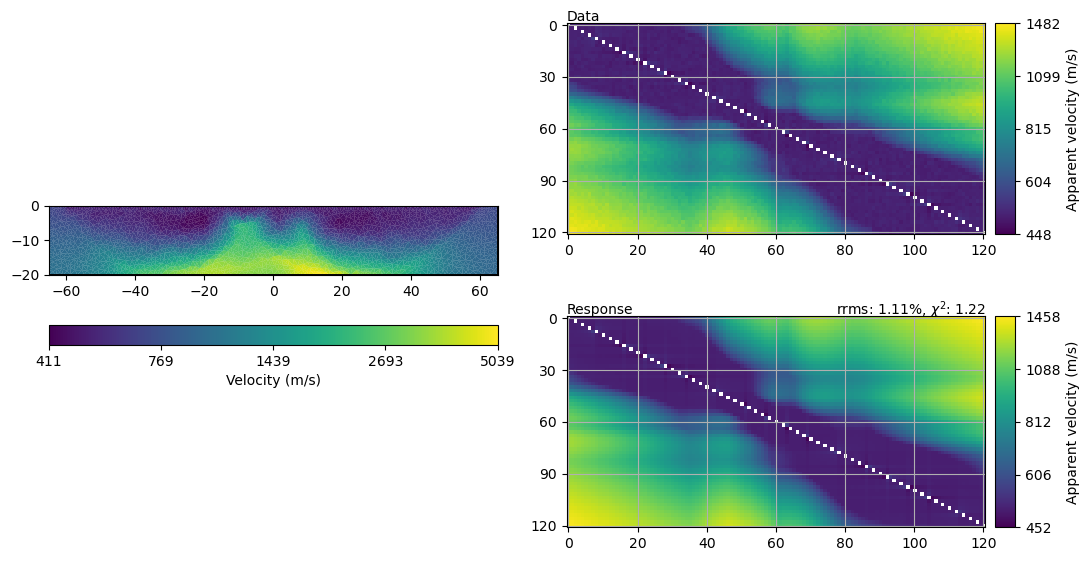

In [18]:
a_list = [0, 50, 200]
lam_list = [1e-5, 1e-3, 1e-1] 
beta = 1e-10

v_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        SRT2 = TravelTimeManager(tt_data)
        Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_srt_norm])

        KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
        Js.setKWInv([KWs])
        Js.setNames(['SRT'])

        Js.runInversion('ME', maxIter=20, chi_limit=1.5)
        SRT2.inv.model = 1/SRT2.inv.model
        SRT2.showResultAndFit(cMap=c_srt)

        [v_est] = Js.getModels()
        
        v_me.append(v_est)
        tit.append(f'lam={lam}, a={a}')

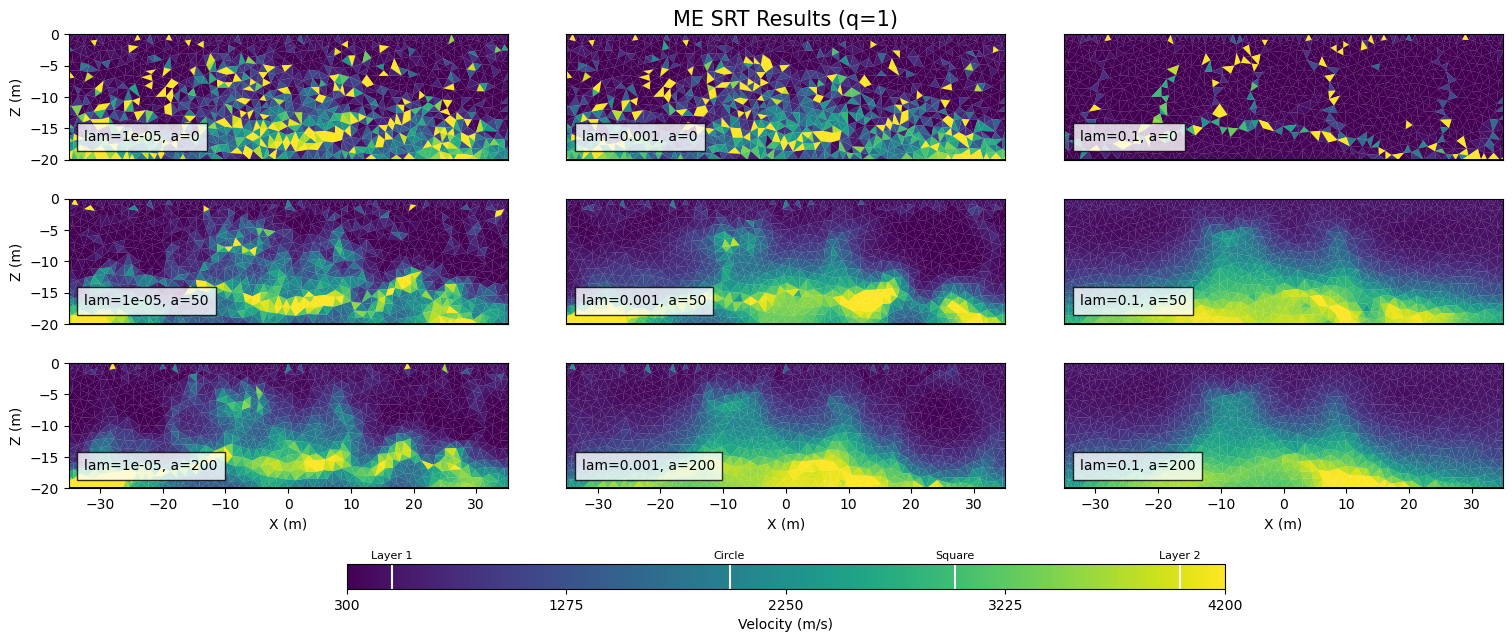

In [19]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'ME SRT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, v_me[i*3+j], ax=ax[i,j], 
                cMap=c_srt, cMin=lim_srt[0], cMax=lim_srt[1], 
                colorBar=False, logScale=False)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_srt[0], cMax=lim_srt[1], logScale=False,cMap=c_srt,
                  label=pg.unit('vel'), orientation='horizontal')
for i, v in enumerate([v_left, v_right, v_layer1, v_layer2]):
    cax.plot([v]*2, [0,1], 'w')
    cax.text(v, 1.3, srt_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_ME_lam_a_q{q}_SRT.pdf', 
            bbox_inches='tight',
            dpi=600)

## MEG ERT lambda and smoothing tests


In [ ]:
a_list = [0, 25, 100]
lam_list = [1e-8, 1e-6, 1e-4] 
beta = 1e-10

r_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        ERT2 = ert.ERTManager(ert_data)
        Je = JEI(mgr_list=[ERT2], data_list=[ert_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_ert_norm])

        KWe = dict(lam=lam, verbose=False)
        Je.setKWInv([KWe])
        Je.setNames(['ERT'])
        Je.setMethodMesh(extmesh, 0)

        Je.runInversion('MEG', maxIter=10, chi_limit=1)
        ERT2.showResultAndFit(cMap=c_ert)

        [r_est] = Je.getModels()
        
        r_me.append(r_est)
        tit.append(f'lam={lam}, a={a}')

13/06/23 - 16:07:08 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 16:07:08 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 16:07:08 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 16:07:08 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 16:07:08 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 16:07:08 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 16:07:08 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 16:07:08 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 6.01
#####     stabilizing functional    S = 676784.77
#####     joint weighted misfit chi^2 = 6.01
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.50
#####     stabilizing functional    S = 9058.94
#####     joint weighted misfit chi^2 = 1.50
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.10
#####     stabilizing functional    S = 78204.41
#####     joint weighted misfit chi^2 = 1.10
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.00
#####     stabilizing functiona

13/06/23 - 16:09:27 - pyGIMLi - INFO - Found 2 regions.
13/06/23 - 16:09:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
13/06/23 - 16:09:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/06/23 - 16:09:27 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


13/06/23 - 16:09:27 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
13/06/23 - 16:09:27 - pyGIMLi - INFO - Use median(data values)=619.288890298902
13/06/23 - 16:09:27 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
13/06/23 - 16:09:27 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 34.73
#####     stabilizing functional    S = 6319386.89
#####     joint weighted misfit chi^2 = 34.73
############################################################
       
Starting iteration 2...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 26.55
#####     stabilizing functional    S = 204938.68
#####     joint weighted misfit chi^2 = 26.55
############################################################
       
Starting iteration 3...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 2.48
#####     stabilizing functional    S = 687.55
#####     joint weighted misfit chi^2 = 2.48
############################################################
       
Starting iteration 4...
Set JMEG weights for ERT with q=1, b=1e-10 and a=0
#####     ERT weighted misfit chi^2   = 1.72
#####     stabilizing func

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000019ACBD6B430> (for post_execute):


In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'MEG ERT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, r_me[i*3+j], ax=ax[i,j], 
                cMap=c_ert, cMin=lim_ert[0], cMax=lim_ert[1], 
                colorBar=False, logScale=True)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_ert[0], cMax=lim_ert[1], logScale=True,cMap=c_ert,
                  label=pg.unit('res'), orientation='horizontal')
for i, r in enumerate([r_left, r_right,r_back]):
    cax.plot([r]*2, [0,1], 'w')
    cax.text(r, 1.3, ert_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')
    
plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_MEG_lam_a_q{q}_ERT.pdf', 
            bbox_inches='tight',
           dpi=600)

## MEG SRT lambda and smoothing tests

In [ ]:
a_list = [0, 50, 200]
lam_list = [1e-7, 1e-5, 1e-3] 
beta = 1e-10

v_me = []
tit  = []

for a in a_list:
    for lam in lam_list:
        SRT2 = TravelTimeManager(tt_data)
        Js = JEI(mgr_list=[SRT2], data_list=[tt_data], mesh=invmesh, order=q, beta=beta, smooth_factor=a, sensitivity_list=[sens_srt_norm])

        KWs = dict(lam=lam, verbose=False, vTop=500, vBottom=4500, secNodes=1)
        Js.setKWInv([KWs])
        Js.setNames(['SRT'])

        Js.runInversion('MEG', maxIter=20, chi_limit=1.5)
        SRT2.inv.model = 1/SRT2.inv.model
        SRT2.showResultAndFit(cMap=c_srt)

        [v_est] = Js.getModels()
        
        v_me.append(v_est)
        tit.append(f'lam={lam}, a={a}')

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,5))
fig.tight_layout(pad=0.5)
ax[0,1].set_title(f'MEG SRT Results (q={q})', fontsize = 15)
for i in np.arange(3):
    for j in np.arange(3):
        pg.show(invmesh, v_me[i*3+j], ax=ax[i,j], 
                cMap=c_srt, cMin=lim_srt[0], cMax=lim_srt[1], 
                colorBar=False, logScale=False)
        
        ax[i,j].text(-32.5, -17, tit[i*3+j], fontsize=10,
                     bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
        ax[i,j].set_xlim(-35,35)
        ax[i,j].set_ylim(-20,0)

# Adjust axis labels
for axis in ax[:,0]:
    axis.set_ylabel('Z (m)')
for axis in ax[-1,:]:
    axis.set_xlabel('X (m)')
for axis_ar in ax[:2,:]:
    for axis in axis_ar:
        axis.set_xticks([])
for axis_ar in ax[:,1:]:
    for axis in axis_ar:
        axis.set_yticks([])

# Add colorbar
cax = ax[2,1].inset_axes([-0.5, -0.8, 2, 0.2])
createColorBarOnly(ax=cax, cMin=lim_srt[0], cMax=lim_srt[1], logScale=False,cMap=c_srt,
                  label=pg.unit('vel'), orientation='horizontal')
for i, v in enumerate([v_left, v_right, v_layer1, v_layer2]):
    cax.plot([v]*2, [0,1], 'w')
    cax.text(v, 1.3, srt_label[i], fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-4/With_Sens/Comp_MEG_lam_a_q{q}_SRT.pdf', 
            bbox_inches='tight',
            dpi=600)